# Практическая работа №1: Краевая задача для уравнения II-го порядка

Выполнил студент гр. 0382 Кондратов Юрий, вариант 9.

## Цель работы

Научиться применять дифференциальные уравнения в различных областях, решать краевую задачу для уравнения II-го порядка путём многократного решения задачи Коши.

## Основные теоретические положения

Краевая задача состоит в нахождении соответствующего краевым условиям решения ДУ. Для ДУ II-го порядка краевая задача имеет вид:
$$\begin{cases} y'' = f(x, y', y)\\ y(x_0) = y_0\\ y(x_1) = y_1. \end{cases}$$

Задача Коши состоит в нахождении соответствующего начальным условиям решения ДУ. Для ДУ II-го порядка задача Коши имеет вид:
$$\begin{cases} y'' = f(x, y', y)\\ y(x_0) = y_0\\ y'(x_0) = y_1. \end{cases}$$

При помощи замены $z_0 = y, z_1 = y'$ данную систему можно привести к виду:
$$\begin{cases} z_1' = f(x, z_1, z_0)\\ z_0' = z_1\\ z_0(x_0) = y_0\\ z_1(x_0) = y_1. \end{cases}$$

## Постановка задачи

Дано дифференциальное уравнение:
$$𝑦′′ = cos(xy), \quad a < 𝑥 < b \quad (1)$$
и граничные условия
$$𝑦(a) = y_a, \quad 𝑦(b) = y_b. \quad (2)$$

Требуется найти решение задачи (1)-(2) и построить его график.
Рассмотрим задачу Коши для уравнения (1) с начальными условиями
$$𝑦(a) = y_a, \quad 𝑦′(a) = ℎ. \quad (3)$$

План решения основан на многократном решении задачи Коши $(1)$, $(3)$.
Значение решения задачи Коши при $𝑥 = b$ является функцией от $ℎ$.
Задача сводится к отысканию такого значения переменной $ℎ$, при котором выполнено условие на правом конце отрезка, т.е. должно выполняться
$$𝑦(b, ℎ) = 2. \quad (4)$$

Это уравнение с одним неизвестным $ℎ$.
Для его решения можно применить стандартный метод половинного
деления.

## Выполнение работы


In [291]:
import math
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numpy import arange


Начальные данные: $a = 0$, $b = 2$, $y_a = 1$, $y_b = 2$.

In [292]:
a = 0
y_a = 1
b = 2
y_b = 2
epsilon = 0.001

Произведём замену $z_0 = y, z_1 = y'$ и представим изначальное уравнение в виде системы:
$$\begin{cases} z_0' = z_1\\ z_1' = cos(xz_0)\\ z_0(a) = y_a\\ z_1(a) = h_0. \end{cases}$$

In [293]:
def f(x, z):
  return [z[1], math.cos(x * z[0])]

Зададим $h_0$. И найдём значение решения задачи Коши в точке $b$:

In [294]:
def y_bh(h): 
  return solve_ivp(f, [a, b], [y_a, h]).y[0][-1]

h_0 = 0
y_bh_0 = y_bh(h_0)
y_bh_0

1.9369542874398211

Выберем $\Delta h$ и зададим направление шага. Направление выберем то, которое даёт нужное приращение $\Delta y$ ($\Delta y > 0$, если $y(b, h_0) < y_b$ и $\Delta y < 0$ иначе). 

In [295]:
dh = 0.00005
if ((y_bh_0 - y_bh(h_0 - dh)) * (y_bh_0 - y_b) > 0):
  dh = -dh
dh

5e-05

Найдём значение $h$, при котором меняется знак неравенства между $y(b, h)$ и $y_b$.

In [296]:
h = h_0 + dh
y_bh_n = y_bh(h)
while (y_bh_n - b) * (y_bh_0 - y_b) >= 0:
  h += dh
  y_bh_n = y_bh(h)
h

0.04905000000000089

Проверим, достаточно ли близко теперь $y(b, h)$ к $y_b$.

In [297]:
abs(y_bh_n - y_b) < epsilon

True

Построим график полученного решения на отрезке $[a, b]$.

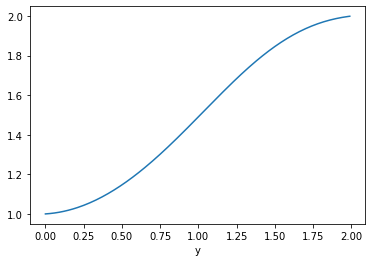

In [298]:
sol = solve_ivp(f, [a, b], [y_a, h], t_eval=arange(a, b, 0.01))
plt.plot(sol.t, sol.y[0])
plt.xlabel("x")
plt.xlabel("y")
plt.show()

## Выводы

В ходе работы путём многократного решения задачи Коши была решена краевая задача для дифференциального уравнения II-го порядка.